In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from proj1_helpers import *
from implementations import * 
import os
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
DATA_TRAIN_PATH = os.path.dirname(os.getcwd()) + '/data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH) # labels/predictions, id of each sample, tX - 30 features of each sample (float)

print("test")

test


In [3]:
y_explore, tX_explore, ids_explore = load_csv_data(DATA_TRAIN_PATH,sub_sample = True) # subsample to do data exploration

In [4]:
labels_feature = np.genfromtxt(DATA_TRAIN_PATH, delimiter=",", dtype=str, max_rows=1)[2:]

print("rere")

rere


## Data Exploration

In [5]:
num_samples = len(y)
num_features0 = tX.shape[1]

print("Number of samples in train data set: {}".format(num_samples))
print("Initial number of features in train data set : {}".format(num_features0))

Number of samples in train data set: 250000
Initial number of features in train data set : 30


In [6]:
print("Number of Nan values in train data set : {}".format(np.argwhere(np.isnan(tX)).shape[0]))
print("Number of Nan values in train data set : {}".format(np.count_nonzero(np.where(tX == np.nan, 1,0))))

Number of Nan values in train data set : 0
Number of Nan values in train data set : 0


In [7]:
tX.dtype

dtype('float64')

In [8]:
range_ = []
for i in range(num_features0):
    range_.append(len(np.unique(tX_explore[:,i])))

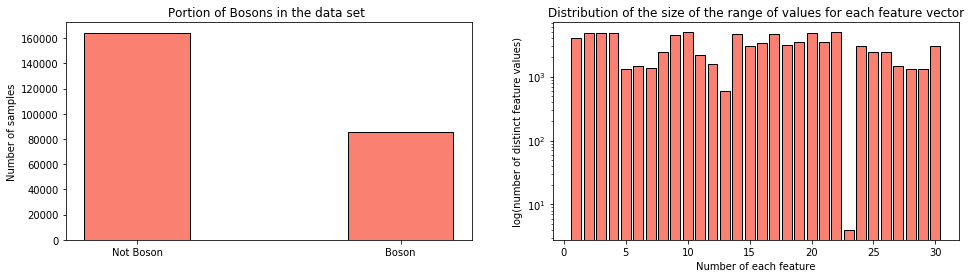

In [9]:
# See the proportion of the 2 class
labels = ['Not Boson','Boson']
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Portion of Bosons in the data set ')
axes[0].bar([-1,1],[np.sum(y==-1),np.sum(y==1)], color='salmon', edgecolor='black', linewidth=1, log = False);
axes[0].set_ylabel('Number of samples')
axes[0].set_xticks([-1,1])
axes[0].set_xticklabels(labels)

axes[1].set_title('Distribution of the size of the range of values for each feature vector')
axes[1].bar(np.arange(num_features0)+1,range_, color='salmon', edgecolor='black', linewidth=1, log = True);
axes[1].set_xlabel('Number of each feature')
axes[1].set_ylabel('log(number of distinct feature values)')
plt.show()

We see that the proportion is not equal, we have to make sure the optimisation procedure takes this into account (proportion of classes in each set, class error instead of classification error)
We see that one feature among all features exhibit a much more restricted range of values, probably a category feature

In [10]:
ids_explore[22]

101100

In [11]:
np.unique(tX_explore[:,22])

array([0., 1., 2., 3.])

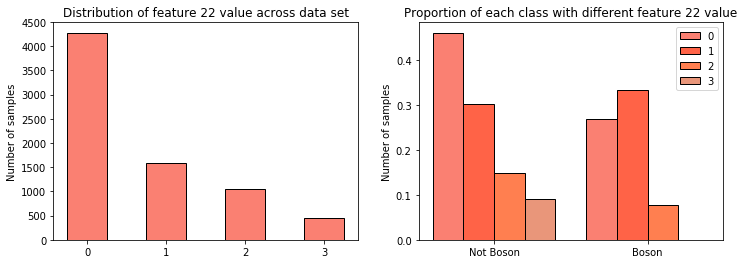

In [12]:
labels1 = ['Not Boson','Boson']
labels0 = ['0','1','2','3']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(np.arange(4),[np.sum(tX_explore==0.),np.sum(tX_explore==1.),np.sum(tX_explore==2.),np.sum(tX_explore==3.)],width=0.5, color='salmon', align='center',edgecolor='black')
axes[0].set_title('Distribution of feature 22 value across data set')
axes[0].set_ylabel('Number of samples')
axes[0].set_xticks(np.arange(4))
axes[0].set_xticklabels(labels0)
axes[1].bar(np.arange(1,3)-0.4, [np.sum(y_explore[tX_explore[:,22]==0.] ==-1)/np.sum(y_explore == -1),np.sum(y_explore[tX_explore[:,22]==0.] ==1)/np.sum(y_explore == 1)], width=0.2, color='salmon', align='center',edgecolor='black',label = '0')
axes[1].bar(np.arange(1,3)-0.2, [np.sum(y_explore[tX_explore[:,22]==1.] ==-1)/np.sum(y_explore == -1),np.sum(y_explore[tX_explore[:,22]==2.] ==1)/np.sum(y_explore == 1)], width=0.2, color='tomato', align='center',edgecolor='black',label = '1')
axes[1].bar(np.arange(1,3), [np.sum(y_explore[tX_explore[:,22]==2.] ==-1)/np.sum(y_explore == -1),np.sum(y_explore[tX_explore[:,22]==3.] ==1)/np.sum(y_explore == 1)], width=0.2, color='coral', align='center',edgecolor='black',label = '2')
axes[1].bar(np.arange(1,3)+0.2, [np.sum(y_explore[tX_explore[:,22]==3.] ==-1)/np.sum(y_explore == -1),np.sum(y_explore[tX_explore[:,22]==4.] ==1)/np.sum(y_explore == 1)], width=0.2, color='darksalmon', align='center',edgecolor='black',label = '3')
axes[1].set_title('Proportion of each class with different feature 22 value')
axes[1].set_ylabel('Number of samples')
axes[1].set_xticks([0.9,1.9])
axes[1].set_xticklabels(labels1)
axes[1].legend()
plt.show()

## Feature Engineering

### *Dealing with undefined values* ###

In [13]:
# Splitting the dataset based on the value of PRI_jet_num and 
# removing undefined features for the corresponding subsets
ss0_tX, ss0_y, ss1_tX, ss1_y, ss2_tX, ss2_y, ss3_tX, ss3_y, labels_feat = split_subsets(tX, y,labels_feature)

Subset 0 contains 99913 samples 
Subset 1 contains 77544 samples 
Subset 2 contains 50379 samples 
Subset 3 contains 22164 samples 
Remaining features for subset 2, 3: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_leading_pt'
 'PRI_jet_leading_eta' 'PRI_jet_leading_phi' 'PRI_jet_subleading_pt'
 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi' 'PRI_jet_all_pt']
Remaining features for subset 1: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi'
 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi' 'PRI_

In [14]:
print(ss0_tX.shape)
print(ss1_tX.shape)
print(ss2_tX.shape)
print(ss3_tX.shape)

(99913, 18)
(77544, 22)
(50379, 29)
(22164, 29)


In [15]:
print("Number of remaining undefined values in subset 0 : {}".format(np.count_nonzero(ss0_tX == -999.0)))
undefined_indices = np.argwhere(ss0_tX == -999.0)

unique_elements, counts_elements = np.unique(undefined_indices[:,1], return_counts=True)
print("Feature repartition of these values : {}".format(np.asarray((unique_elements, counts_elements))))

print("Number of remaining undefined values in subset 1 : {}".format(np.count_nonzero(ss1_tX == -999.0)))
undefined_indices = np.argwhere(ss1_tX == -999.0)

unique_elements, counts_elements = np.unique(undefined_indices[:,1], return_counts=True)
print("Feature repartition of these values : {}".format(np.asarray((unique_elements, counts_elements))))

print("Number of remaining undefined values in subset 2 : {}".format(np.count_nonzero(ss2_tX == -999.0)))
undefined_indices = np.argwhere(ss2_tX == -999.0)

unique_elements, counts_elements = np.unique(undefined_indices[:,1], return_counts=True)
print("Feature repartition of these values : {}".format(np.asarray((unique_elements, counts_elements))))

print("Number of remaining undefined values in subset 3 : {}".format(np.count_nonzero(ss3_tX == -999.0)))
undefined_indices = np.argwhere(ss3_tX == -999.0)

unique_elements, counts_elements = np.unique(undefined_indices[:,1], return_counts=True)
print("Feature repartition of these values : {}".format(np.asarray((unique_elements, counts_elements))))

Number of remaining undefined values in subset 0 : 26123
Feature repartition of these values : [[    0]
 [26123]]
Number of remaining undefined values in subset 1 : 7562
Feature repartition of these values : [[   0]
 [7562]]
Number of remaining undefined values in subset 2 : 2952
Feature repartition of these values : [[   0]
 [2952]]
Number of remaining undefined values in subset 3 : 1477
Feature repartition of these values : [[   0]
 [1477]]


In [16]:
# Indices of column containing remaining -999 
print('Columns where -999 remain in subset 0: {}'.format(np.unique(np.argwhere(np.where(ss0_tX == -999.0,1,0))[:,1])))
print('Columns where -999 remain in subset 1: {}'.format(np.unique(np.argwhere(np.where(ss1_tX == -999.0,1,0))[:,1])))
print('Columns where -999 remain in subset 2: {}'.format(np.unique(np.argwhere(np.where(ss2_tX == -999.0,1,0))[:,1])))
print('Columns where -999 remain in subset 3: {}'.format(np.unique(np.argwhere(np.where(ss3_tX == -999.0,1,0))[:,1])))

Columns where -999 remain in subset 0: [0]
Columns where -999 remain in subset 1: [0]
Columns where -999 remain in subset 2: [0]
Columns where -999 remain in subset 3: [0]


Thus all remaining undefined values belong to the first feature **DER_mass_MMC**.

In [17]:
# CREATING DIFFERENT SUBSETS OF FEATURES TO TEST

# Subset feature 1 : primitive and derivated features with replacemnet of DET_mass_MMC by median of defined values
ss0_tX1 = replace_undef_feat(ss0_tX,method = 'median')
ss1_tX1 = replace_undef_feat(ss1_tX,method = 'median')
ss2_tX1 = replace_undef_feat(ss2_tX,method = 'median')
ss3_tX1 = replace_undef_feat(ss3_tX,method = 'median')

In [18]:
# Indices of column containing remaining -999 
print('Columns where -999 remain in subset 0: {}'.format(np.unique(np.argwhere(np.where(ss0_tX1 == -999.0,1,0))[:,1])))
print('Columns where -999 remain in subset 1: {}'.format(np.unique(np.argwhere(np.where(ss1_tX1 == -999.0,1,0))[:,1])))
print('Columns where -999 remain in subset 2: {}'.format(np.unique(np.argwhere(np.where(ss2_tX1 == -999.0,1,0))[:,1])))
print('Columns where -999 remain in subset 3: {}'.format(np.unique(np.argwhere(np.where(ss3_tX1 == -999.0,1,0))[:,1])))

Columns where -999 remain in subset 0: []
Columns where -999 remain in subset 1: []
Columns where -999 remain in subset 2: []
Columns where -999 remain in subset 3: []


### _Dealing with outliers_

In [ ]:
#Plotting sccatter of the features
for i in range(0,np.size(ss0_tX,1)-1,2):
    fig = scatter_visualization(ss0_y, ss0_tX[:,i], ss0_tX[:,i+1],i)
    fig.set_size_inches(25.0,4.0)

In [ ]:
#Plotting histograms of the features
for i in range(0,np.size(ss0_tX1,1)-1,2):
    histo_visualization(ss0_tX1[:,i], tX_explore[:,i+1],i, 2.5)

for i in range(0,np.size(ss1_tX1,1)-1,2):
    histo_visualization(ss1_tX1[:,i], tX_explore[:,i+1],i, 2.5)
    
for i in range(0,np.size(ss2_tX1,1)-1,2):
    histo_visualization(ss2_tX1[:,i], tX_explore[:,i+1],i, 2.5)
    
for i in range(0,np.size(ss3_tX1,1)-1,2):
    histo_visualization(ss3_tX1[:,i], tX_explore[:,i+1],i, 2.5)

In [ ]:
from scipy import stats #je sais on a pas le droit, mais c'est pour comparer ! 

z = np.abs(stats.zscore(tX_explore))
threshold = 3
tX_explore_o = tX_explore[(z < 3).all(axis=1)]
print (tX_explore.shape, tX_explore_o.shape)

In [ ]:
#Même chose qu'avec z scor mais 3 std
deviation_feature = np.std(tX_explore,axis = 0)
mean_feature = np.mean(tX_explore,axis = 0)
index = []
for i in range(np.size(tX_explore,1)):
    dev_idx = deviation_feature[i]
    mean_idx = mean_feature[i]
    threshold = (3*dev_idx) + mean_idx
    for j in range(np.size(tX_explore,0)):
        if abs(tX_explore[j,i]) > threshold:
            index.append(j)

tX_explore_outliers = np.delete(tX_explore, index, 0)
print (tX_explore.shape, tX_explore_outliers.shape)

### *Feature selection* ###

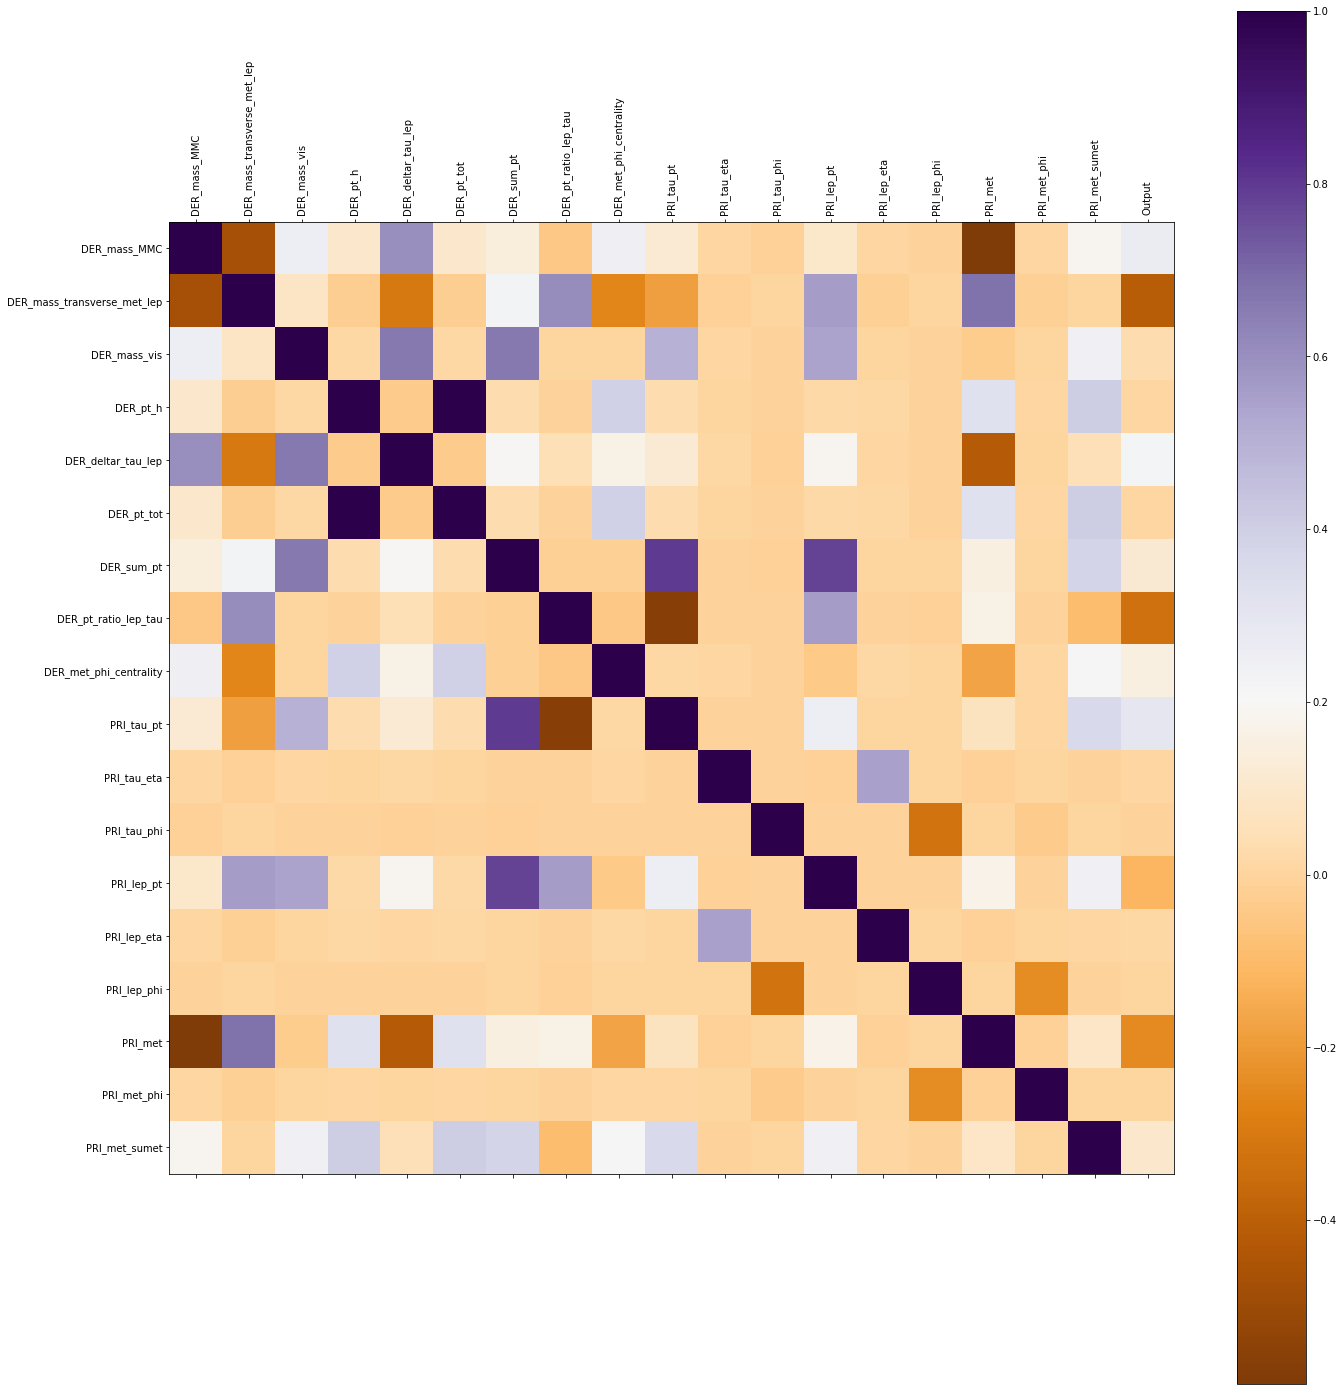

Ranked absolute correlation with output:  [0.00118623 0.00433271 0.00560195 0.00649609 0.01130753 0.01130754
 0.01400618 0.03260868 0.10283878 0.11671578 0.11791007 0.15244192
 0.22060187 0.24297142 0.26355218 0.29349415 0.3330028  0.41303171]
Ranked features:  ['PRI_met_phi', 'PRI_lep_phi', 'PRI_tau_phi', 'PRI_tau_eta', 'DER_pt_h', 'DER_pt_tot', 'PRI_lep_eta', 'DER_mass_vis', 'PRI_met_sumet', 'DER_sum_pt', 'PRI_lep_pt', 'DER_met_phi_centrality', 'DER_deltar_tau_lep', 'PRI_met', 'DER_mass_MMC', 'PRI_tau_pt', 'DER_pt_ratio_lep_tau', 'DER_mass_transverse_met_lep']

 Highly correlated features (correlation above 0.85) : [['DER_pt_h' 'DER_pt_tot']] 
Index:  [[3 5]]


In [19]:
# Plot a heat map of the correlations between features
# SUBSET 0

labels_0, labels_1, labels_2, labels_3 = labels_feat

ranked_index_ss0, ranked_features_ss0 = plot_correlation_matrix(ss0_tX, ss0_y, np.append(labels_0,'Output'), "CorrelationMatrix_ss0.png")

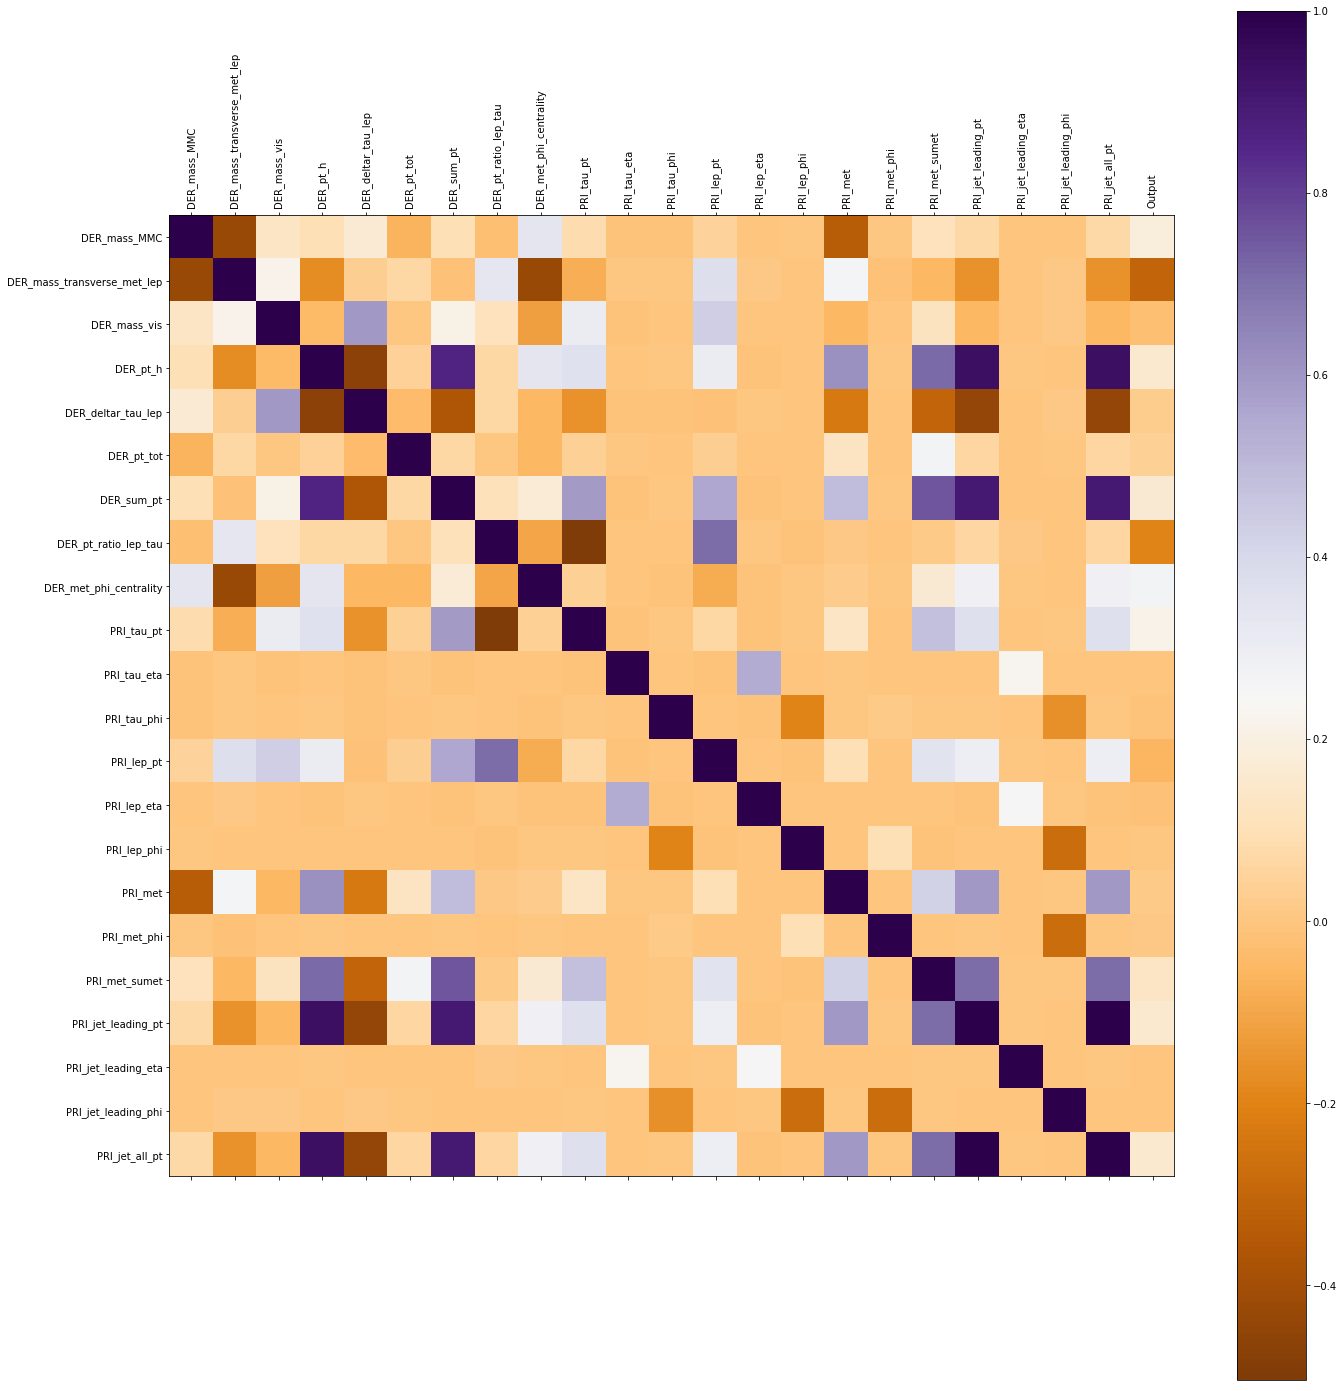

Ranked absolute correlation with output:  [0.00247231 0.00256178 0.00390937 0.00399311 0.00763413 0.00939262
 0.01150323 0.01692276 0.02431924 0.02976829 0.03885429 0.05697775
 0.13289756 0.15517869 0.15753083 0.15753083 0.15989151 0.18396021
 0.1941607  0.21539337 0.26601088 0.29945282]
Ranked features:  ['PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_lep_phi', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_met_phi', 'PRI_lep_eta', 'PRI_met', 'DER_mass_vis', 'DER_deltar_tau_lep', 'DER_pt_tot', 'PRI_lep_pt', 'PRI_met_sumet', 'DER_pt_h', 'PRI_jet_leading_pt', 'PRI_jet_all_pt', 'DER_sum_pt', 'DER_mass_MMC', 'DER_pt_ratio_lep_tau', 'PRI_tau_pt', 'DER_met_phi_centrality', 'DER_mass_transverse_met_lep']

 Highly correlated features (correlation above 0.85) : [['DER_pt_h' 'DER_sum_pt']
 ['DER_pt_h' 'PRI_jet_leading_pt']
 ['DER_pt_h' 'PRI_jet_all_pt']
 ['DER_sum_pt' 'PRI_jet_leading_pt']
 ['DER_sum_pt' 'PRI_jet_all_pt']
 ['PRI_jet_leading_pt' 'PRI_jet_all_pt']] 
Index:  [[ 3  6]
 [ 3 18]
 [ 3 21]
 [ 

In [20]:
# SUBSET 1
ranked_index_ss1, ranked_features_ss1 = plot_correlation_matrix(ss1_tX, ss1_y, np.append(labels_1,'Output'), "CorrelationMatrix_ss1.png")

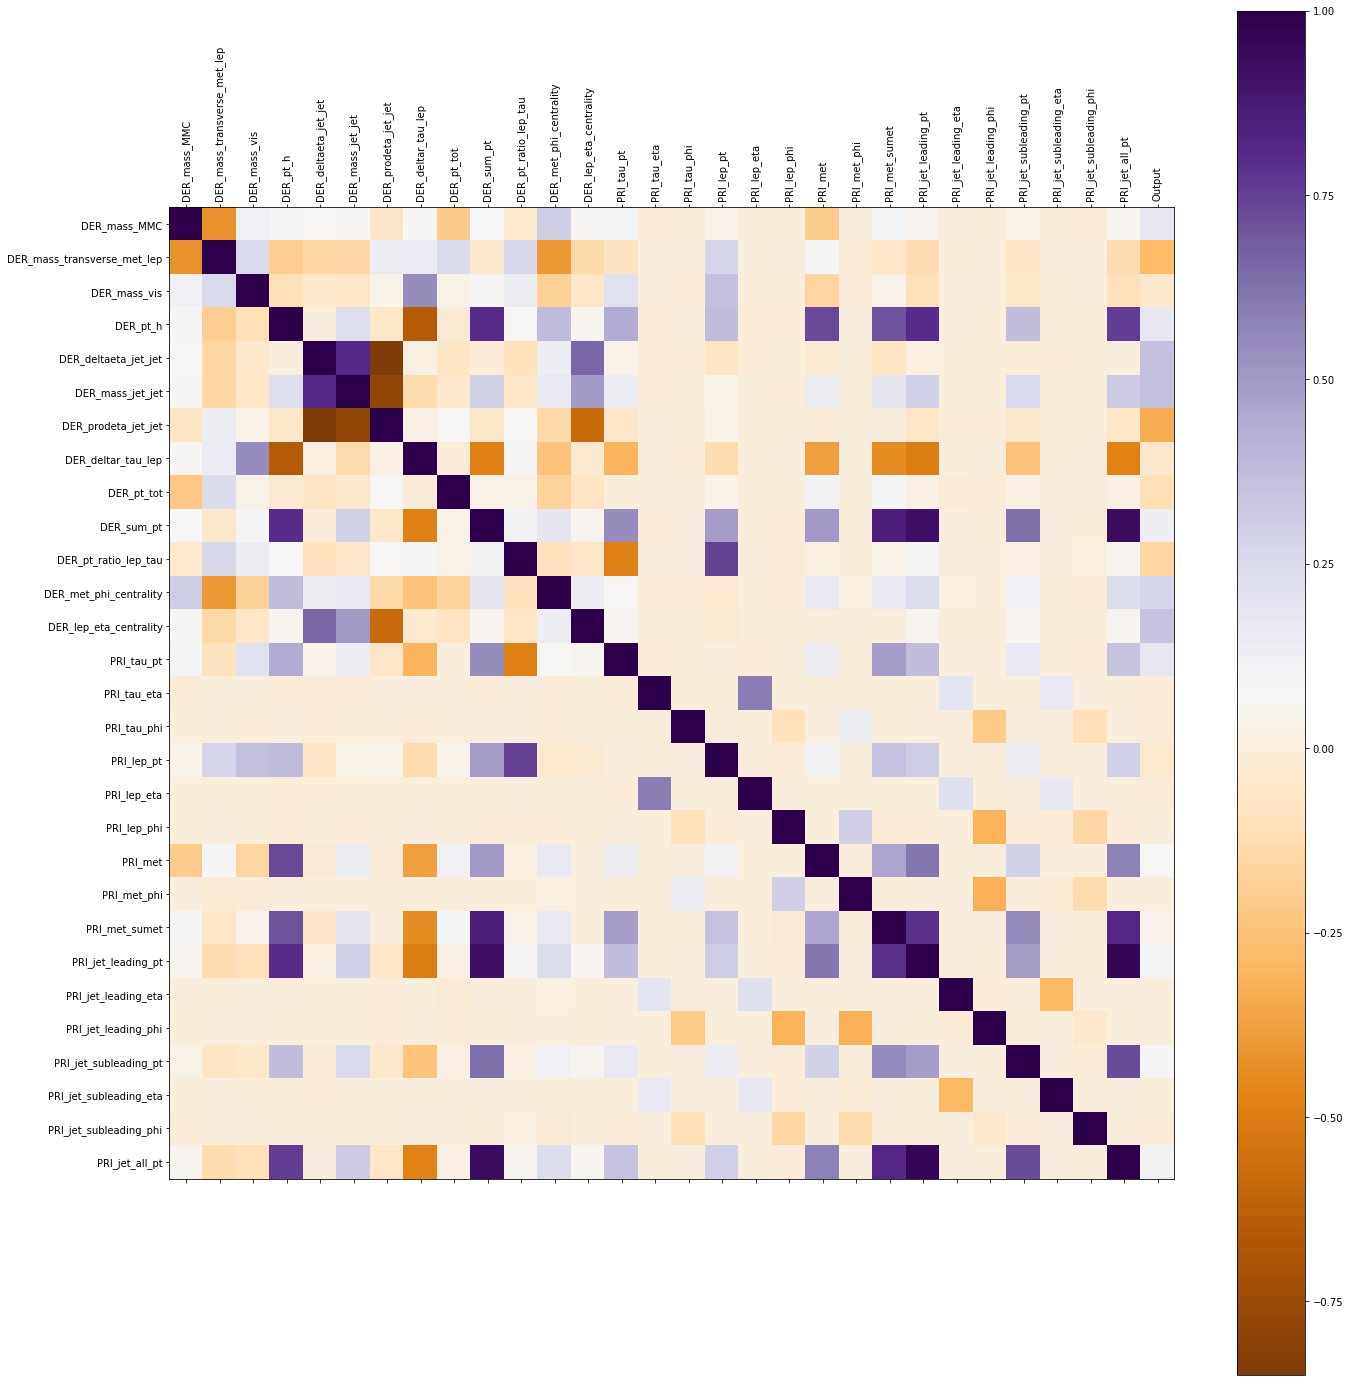

Ranked absolute correlation with output:  [0.00063383 0.00266403 0.00513931 0.00525639 0.00594418 0.0092888
 0.00961162 0.00981657 0.01099591 0.03562675 0.04164074 0.04384058
 0.04508089 0.06793284 0.08776314 0.10157798 0.10971267 0.11205288
 0.12411295 0.15328926 0.17161733 0.17721072 0.17933965 0.2745458
 0.28076779 0.32993785 0.3482023  0.36228272 0.3622878 ]
Ranked features:  ['PRI_jet_subleading_eta', 'PRI_lep_phi', 'PRI_tau_phi', 'PRI_jet_leading_phi', 'PRI_jet_leading_eta', 'PRI_jet_subleading_phi', 'PRI_met_phi', 'PRI_lep_eta', 'PRI_tau_eta', 'PRI_lep_pt', 'DER_mass_vis', 'PRI_met_sumet', 'DER_deltar_tau_lep', 'PRI_met', 'PRI_jet_subleading_pt', 'PRI_jet_leading_pt', 'PRI_jet_all_pt', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_pt_h', 'DER_mass_MMC', 'PRI_tau_pt', 'DER_met_phi_centrality', 'DER_mass_transverse_met_lep', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet']

 Highly correlated features (correlation above 0.85) 

In [21]:
# SUBSET 2
ranked_index_ss2, ranked_features_ss2 = plot_correlation_matrix(ss2_tX, ss2_y, np.append(labels_2,'Output'), "CorrelationMatrix_ss2.png")

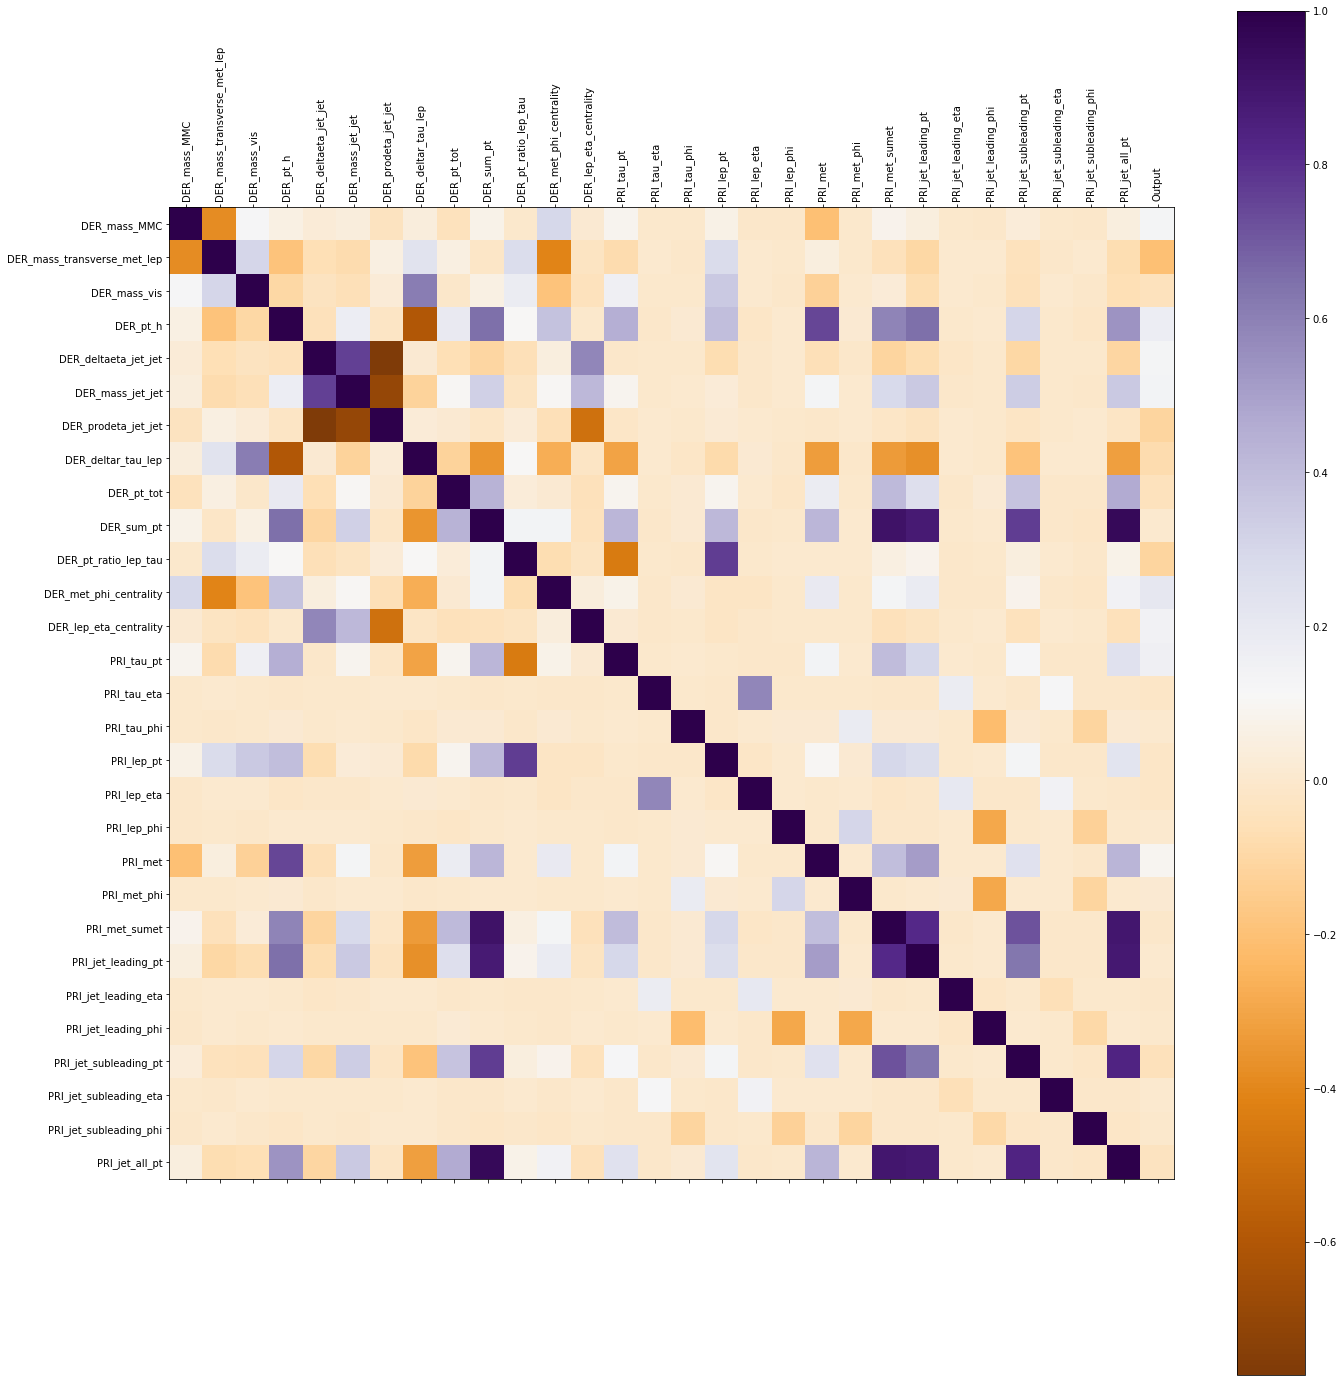

Ranked absolute correlation with output:  [0.00251082 0.00261133 0.00366877 0.00410472 0.00516101 0.00620752
 0.00685533 0.00730996 0.0077946  0.01154536 0.01393669 0.01561212
 0.01611871 0.03255241 0.04177102 0.04520867 0.04908127 0.07857676
 0.0936133  0.11091158 0.11478776 0.13205937 0.13376791 0.13742037
 0.14545394 0.15740995 0.17557338 0.20467297 0.21000796]
Ranked features:  ['PRI_tau_phi', 'DER_sum_pt', 'PRI_jet_subleading_phi', 'PRI_jet_leading_phi', 'PRI_jet_leading_eta', 'PRI_lep_phi', 'PRI_met_sumet', 'PRI_jet_leading_pt', 'PRI_jet_subleading_eta', 'PRI_met_phi', 'PRI_lep_eta', 'PRI_tau_eta', 'PRI_lep_pt', 'PRI_jet_all_pt', 'DER_pt_tot', 'DER_mass_vis', 'PRI_jet_subleading_pt', 'DER_deltar_tau_lep', 'PRI_met', 'DER_prodeta_jet_jet', 'DER_pt_ratio_lep_tau', 'DER_deltaeta_jet_jet', 'DER_mass_MMC', 'DER_mass_jet_jet', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'DER_pt_h', 'DER_mass_transverse_met_lep', 'DER_met_phi_centrality']

 Highly correlated features (correlation above 0.85

In [22]:
# SUBSET 3
ranked_index_ss3, ranked_features_ss3 = plot_correlation_matrix(ss3_tX, ss3_y, np.append(labels_3,'Output'), "CorrelationMatrix_ss3.png")

In [23]:
ss0_tX, ss0_y, ss1_tX, ss1_y, ss2_tX, ss2_y, ss3_tX, ss3_y, labels_feat = split_subsets(tX, y,labels_feature)
ss0_tX3 = replace_undef_feat(ss0_tX,method = 'median')
ss1_tX3 = replace_undef_feat(ss1_tX,method = 'median')
ss2_tX3 = replace_undef_feat(ss2_tX,method = 'median')
ss3_tX3 = replace_undef_feat(ss3_tX,method = 'median')
#ss0_tX, ss1_tX, ss2_tX, ss3_tX, labels_feat = remove_correlated_feat(ss0_tX, ss1_tX, ss2_tX, ss3_tX, labels_feat)
ss0_tX3, ss1_tX3, ss2_tX3, ss3_tX3, labels_feat = remove_correlated_feat(ss0_tX3, ss1_tX3, ss2_tX3, ss3_tX3, labels_feat)

Subset 0 contains 99913 samples 
Subset 1 contains 77544 samples 
Subset 2 contains 50379 samples 
Subset 3 contains 22164 samples 
Remaining features for subset 2, 3: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_leading_pt'
 'PRI_jet_leading_eta' 'PRI_jet_leading_phi' 'PRI_jet_subleading_pt'
 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi' 'PRI_jet_all_pt']
Remaining features for subset 1: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi'
 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi' 'PRI_

## Model selection and Optimisation

In [24]:
# Choosing the subset on which to test models
from implementations import * 
ss_y = ss1_y
ss_tX = ss1_tX1

## Least Square Stochastic Gradient Descent

In [43]:
from implementations import * 
initial_w = np.zeros(ss_tX.shape[1]+1)
max_iters = 3000
gamma = [0.4]  # best range is up to 0.15

In [44]:
# test 1 : degree 1 rmse, all features, not removal of outliers ,  median undef  
# Using rmse with non equal classes
loss_tr1, loss_te1, w1 = cross_validation_demo(ss_y, ss_tX, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse',method = 'lsSGD',hyperparams=[initial_w,max_iters,gamma,1])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
SGD(gamma = 0.4,2999): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.4,2999): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.4,2999): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.4,2999): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.4,2999): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


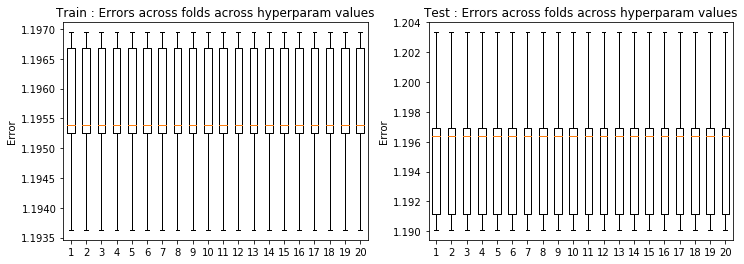

In [27]:
result_crossval(loss_tr1,loss_te1)

In [28]:
# test 2 : degree 2 rmse, all features, not removal of outliers, median undef  
initial_w = np.zeros(2*(ss_tX.shape[1])+1)
gamma = np.linspace(0.01,0.3,20) # baisser la range car degree high avec high gamma => weights very large
loss_tr2, loss_te2, w2 = cross_validation_demo(ss_y, ss_tX, degree = 2, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse',method = 'lsSGD',hyperparams=[initial_w,max_iters,gamma,1])



Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(

SGD(gamma = 0.1473684210526316,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.1473684210526316,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.1473684210526316,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.1473684210526316,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.16263157894736843,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.16263157894736843,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

SGD(gamma = 0.2847368421052632,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.2847368421052632,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.2847368421052632,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

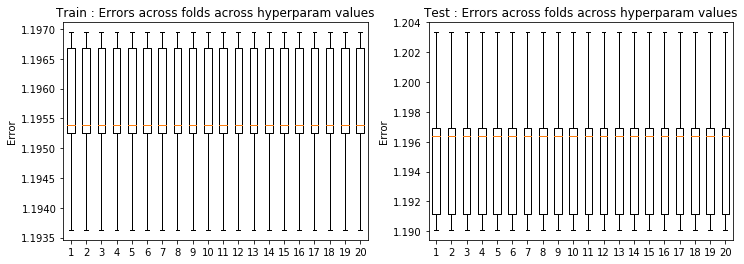

In [29]:
result_crossval(loss_tr2,loss_te2)

In [30]:
# test 3 : degree 3 rmse, all features, not removal of outliers, median undef  
initial_w = np.zeros(3*(ss_tX.shape[1])+1)
gamma = np.linspace(0.01,0.3,20) # baisser la range car degree high avec high gamma => weights very large
loss_tr3, loss_te3, w3 = cross_validation_demo(ss_y, ss_tX, degree = 3, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse',method = 'lsSGD',hyperparams=[initial_w,max_iters,gamma,1])



Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

SGD(gamma = 0.10157894736842105,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.10157894736842105,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.11684210526315789,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.11684210526315789,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.11

SGD(gamma = 0.20842105263157895,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.20842105263157895,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.20842105263157895,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.2236842105263158,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.223

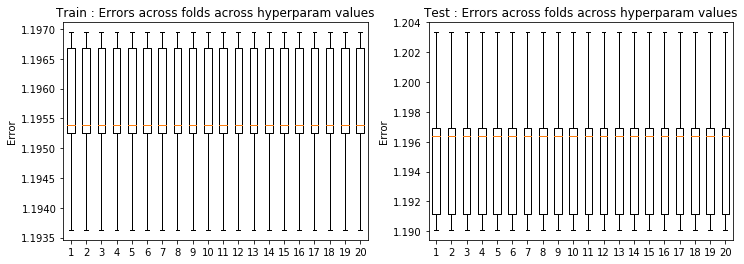

In [31]:
result_crossval(loss_tr3,loss_te3)

In [32]:
# test 4 : degree 1 class, all features, not removal of outliers, median undef  
initial_w = np.zeros(1*(ss_tX.shape[1])+1)
gamma = np.linspace(0.01,0.4,20) 
loss_tr4, loss_te4, w4 = cross_validation_demo(ss_y, ss_tX, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'class',method = 'lsSGD',hyperparams=[initial_w,max_iters,gamma,1])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.030526315789473686,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.030526315789473686,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.030526315789473686,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


SGD(gamma = 0.2973684210526316,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.2973684210526316,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3178947368421053,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3178947368421053,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3178947368421053,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3178947368421053,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3178947368421053,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.33842105263157896,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.33842105263157896,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

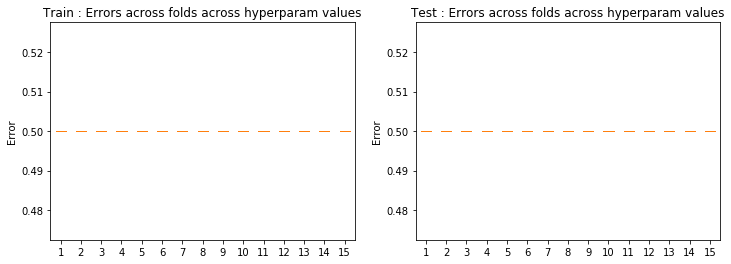

In [33]:
result_crossval(loss_tr4[:-5],loss_te4[:-5])

In [34]:
# test 5 : degree 2, class, all features, not removal of outliers, median undef
initial_w = np.zeros(2*(ss_tX.shape[1])+1)
gamma = np.linspace(0.01,0.3,20) 
loss_tr5, loss_te5, w5 = cross_validation_demo(ss_y, ss_tX, degree = 2, seed = 5, k_fold = 5, class_distribution = False, error = 'class',method = 'lsSGD',hyperparams=[initial_w,max_iters,gamma,1])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(

SGD(gamma = 0.1473684210526316,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.1473684210526316,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.1473684210526316,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.1473684210526316,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.16263157894736843,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.16263157894736843,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

SGD(gamma = 0.2847368421052632,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.2847368421052632,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.2847368421052632,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

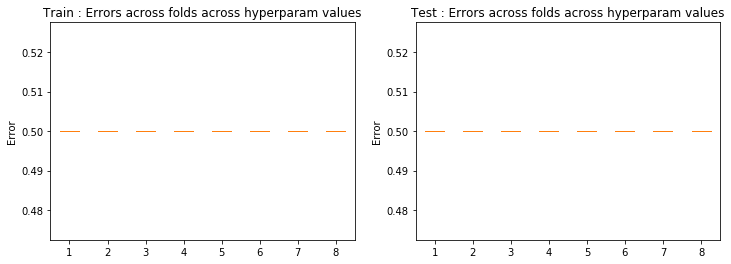

In [35]:
result_crossval(loss_tr5[:8],loss_te5[:8])

In [36]:
# test 6 : degree 3, class, all features, not removal of outliers, median undef
initial_w = np.zeros(3*(ss_tX.shape[1])+1)
gamma = np.linspace(0.01,0.3,20)
loss_tr6, loss_te6, w6 = cross_validation_demo(ss_y, ss_tX, degree = 3, seed = 5, k_fold = 5, class_distribution = False, error = 'class',method = 'lsSGD',hyperparams=[initial_w,max_iters,gamma,1])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

SGD(gamma = 0.10157894736842105,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.10157894736842105,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.11684210526315789,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.11684210526315789,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.11

SGD(gamma = 0.20842105263157895,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.20842105263157895,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.20842105263157895,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.2236842105263158,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.223

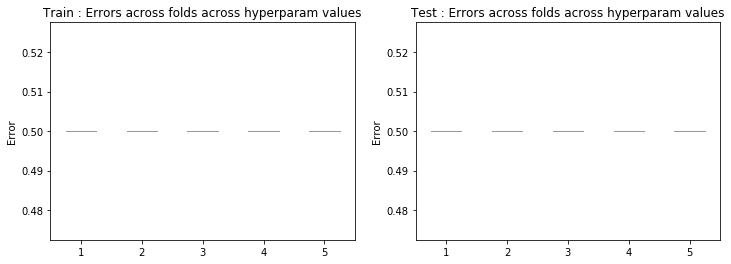

In [37]:
result_crossval(loss_tr6[:5],loss_te6[:5])

In [38]:
# test 7 : degree 1, classification, all features, not removal of outliers, median undef
initial_w = np.zeros(1*(ss_tX.shape[1])+1)
gamma = np.linspace(0.01,0.4,20)
loss_tr7, loss_te7, w7 = cross_validation_demo(ss_y, ss_tX, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'classification',method = 'lsSGD',hyperparams=[initial_w,max_iters,gamma,1])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.030526315789473686,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.030526315789473686,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.030526315789473686,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


SGD(gamma = 0.2973684210526316,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.2973684210526316,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3178947368421053,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3178947368421053,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3178947368421053,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3178947368421053,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.3178947368421053,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.33842105263157896,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SGD(gamma = 0.33842105263157896,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

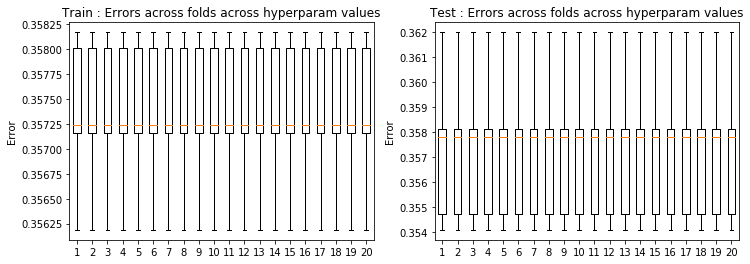

In [39]:
result_crossval(loss_tr7,loss_te7)

In [40]:
# test 8 : degree 2, classification, all features, not removal of outliers, median undef
initial_w = np.zeros(1*(ss_tX.shape[1])+1)
gamma = np.linspace(0.01,0.3,20)
loss_tr8, loss_te8, w8 = cross_validation_demo(ss_y, ss_tX, degree = 2, seed = 5, k_fold = 5, class_distribution = False, error = 'classification',method = 'lsSGD',hyperparams=[initial_w,max_iters,gamma,1])


Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %
SGD(gamma = 0.01,1499): w=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


ValueError: shapes (62032,45) and (23,) not aligned: 45 (dim 1) != 23 (dim 0)

In [ ]:
result_crossval(loss_tr8,loss_te8)

In [ ]:
# test 9 : degree 3, classification, all features, not removal of outliers, median undef
initial_w = np.zeros(1*(ss_tX.shape[1])+1)
gamma = np.linspace(0.01,0.3,20)
loss_tr9, loss_te9, w9 = cross_validation_demo(ss_y, ss_tX, degree = 3, seed = 5, k_fold = 5, class_distribution = False, error = 'classification',method = 'lsSGD',hyperparams=[initial_w,max_iters,gamma,1])


In [ ]:
result_crossval(loss_tr9,loss_te9)

In [ ]:
# test 10: degree 1, rmse, all features, removal of outliers ()

In [ ]:
# commencer par feature selection 

## Least Square Stochastic Gradient Descent

In [ ]:
from implementations import * 
initial_w = np.zeros(ss_tX.shape[1]+1)
max_iters = 500
gamma = np.linspace(0.01,0.18,10)
batch_size = 100

In [ ]:
# Using rmse and non equal classes 
loss_tr, loss_te, w = cross_validation_demo(ss_y, ss_tX, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse',method = 'lsSGD',hyperparams=[initial_w,max_iters,gamma,batch_size])

## Ridge Regression

In [ ]:
from implementations import * 
lambdas = np.linspace(0.05,0.8,20)
initial_w = np.zeros(ss_tX.shape[1]+1)
max_iters = 500
gammas = np.linspace(0.01,0.18,20)


In [ ]:
loss_tr, loss_te, w = cross_validation_demo(ss_y, ss_tX, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse',method = 'rr',hyperparams=[initial_w,max_iters,gammas,lambdas])



In [ ]:
result_crossval(loss_tr,loss_te)

In [ ]:
loss_tr, loss_te, w = cross_validation_demo(ss_y, ss_tX, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'classification',method = 'rr',hyperparams=[initial_w,max_iters,gammas,lambdas])



In [ ]:
result_crossval(loss_tr,loss_te)

In [ ]:
loss_tr, loss_te, w = cross_validation_demo(ss_y, ss_tX, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'class',method = 'rr',hyperparams=[initial_w,max_iters,gammas,lambdas])



In [ ]:
result_crossval(loss_tr,loss_te)

In [ ]:
for i in range(1):
    print(i)

## Logistic Regression

In [ ]:
from implementations import * 
lambdas = np.linspace(0.05,0.8,20)
initial_w = np.zeros(ss_tX.shape[1]+1)
max_iters = 500
gammas = np.linspace(0.01,0.18,20)

In [ ]:
loss_tr, loss_te, w = cross_validation_demo(ss_y, ss_tX, degree = 1, seed = 5, k_fold = 5, class_distribution = False, error = 'class',method = 'rr',hyperparams=[initial_w,max_iters,gammas,lambdas])



### Regularized Logistic Regression

## Final Training on full data set

In [ ]:
# A CHANGER POUR CHAQUE SUBMISSION AVEC BEST WEIGHTS !!!
final_degree = 1 # TO UPDATE 

# CHANGE THE ss0_tX variable depending on the features to use
ss0_y, ss0_tX_train = build_model_data(build_poly(ss0_tX, final_degree), ss0_y)
ss1_y, ss1_tX_train = build_model_data(build_poly(ss1_tX, final_degree), ss1_y)
ss2_y, ss2_tX_train = build_model_data(build_poly(ss2_tX, final_degree), ss2_y)
ss3_y, ss3_tX_train = build_model_data(build_poly(ss3_tX, final_degree), ss3_y)

# standardisation
ss0_tX_train, mean0, std0 = standardize(ss0_tX_train)
ss1_tX_train, mean1, std1 = standardize(ss1_tX_train)
ss2_tX_train, mean2, std2 = standardize(ss2_tX_train)
ss3_tX_train, mean3, std3 = standardize(ss3_tX_train)

In [ ]:
# TO UPDATE !!!!  
#find optimal weights for the entire train set
weights0 = np.ones(ss0_tX_train.shape[1])
weights1 = np.ones(ss1_tX_train.shape[1])
weights2 = np.ones(ss2_tX_train.shape[1])
weights3 = np.ones(ss3_tX_train.shape[1])

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = os.path.dirname(os.getcwd()) + '/data/test.csv')
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
ss0_tX_test, index0, ss1_tX_test, index1, ss2_tX_test, index2, ss3_tX_test, index3= split_subsets_test(tX_test)

In [ ]:
_, ss0_tX_test = build_model_data(build_poly(ss0_tX_test, final_degree), [])
_, ss1_tX_test = build_model_data(build_poly(ss1_tX_test, final_degree), [])
_, ss2_tX_test = build_model_data(build_poly(ss2_tX_test, final_degree), [])
_, ss3_tX_test = build_model_data(build_poly(ss3_tX_test, final_degree), [])

In [ ]:
# standardize test data
ss0_tX_test, _, _ = standardize(ss0_tX_train, mean0, std0)
ss1_tX_test, _, _ = standardize(ss1_tX_train, mean1, std1)
ss2_tX_test, _, _ = standardize(ss2_tX_train, mean2, std2)
ss3_tX_test, _, _ = standardize(ss3_tX_train, mean3, std3)

In [ ]:
# NE PLUS RIEN CHANGER A PARTIR D'ICI
# Subset 0 
y_pred0 = predict_labels(weights0, ss0_tX_test)
#Subset 1
y_pred1 = predict_labels(weights1, ss1_tX_test)
#Subset 2
y_pred2 = predict_labels(weights2, ss2_tX_test)
#Subset 3
y_pred3 = predict_labels(weights3, ss3_tX_test)

#Stack all prediction from 4 subgroups to get y_pred in corredt order 
y_pred = np.ones(len(ids_test))
y_pred[index0] = y_pred0
y_pred[index1] = y_pred1
y_pred[index2] = y_pred2
y_pred[index3] = y_pred3

In [ ]:
OUTPUT_PATH = os.path.dirname(os.getcwd()) + '/data/' + str(datetime.now())# TODO: fill in desired name of output file for submission
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)